Конкурсное задание на прохождение научно-исследовательской практики в технопарке Кванториум.  
Выполнила: Мытницкая Мария, гр. 0ВМ81 ТПУ

$\textbf{Задание 1.}$  
Бросают 2 игральные кости. Найти вероятности следующих событий: A – сумма числа
очков не превосходит 5; B – произведение числа очков не превосходит 4; C – произведение
числа очков делится на 8.

$\textbf{Решение:}$  
1) Создадим двумерный массив, состоящий из всех возможных комбинаций чисел и найдем их общее количество:

In [6]:
import numpy as np
x=np.arange(1,7)
from itertools import product
comb = list(product(x,repeat=2))
n=len(comb)

2) Найдем множества исходов благоприятных событиям A, B и C.

In [7]:
A,B,C=0,0,0
for element in comb:
    if ((element[0]+element[1])<=5):
        A=A+1
    if ((element[0]*element[1])<=4):
        B=B+1
    if ((element[0]*element[1])%8==0):
        C=C+1

3) Используя классическую формулу вероятности $P(X)=\frac{m_X}{n}$ вычислим вероятность событий A, B и C.

In [9]:
def P(lenght,goods):
    return goods/lenght

$\textbf{Ответ:}$

In [10]:
print(P(n,A),P(n,B),P(n,C))

0.2777777777777778 0.2222222222222222 0.1388888888888889


$\textbf{Задание 2.}$  
Случайным образом в интервале (0,1) выбираются два числа: a и b. Найти вероятность
следующих событий: a+b<1; ab <1/2. 

$\textbf{Решение.}$  
1) Выберем декартову систему координат, и на оси Ox будем откладывать число a, а на оси Oy — число b.  
2) Построим график функции благоприпятствующей событию А

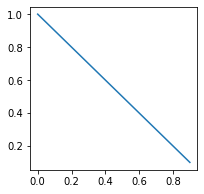

In [43]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 1, 0.1)
plt.figure(1, figsize = (3,3))
plt.plot(x, 1-x)
plt.show()

3) Найдем площадь области под графиком функции, это будет $S_g$. По условиям задачи 0 < a < 1, 0 < b < 1, тогда множеству элементарных исходов (область G) при таком подходе будет соответствовать квадрат со стороной, равной единице: $S_G = 1$  
4) Используя формулу $P(A)=\frac{S_g}{S_G}$ вычислим вероятность события А.

In [44]:
from scipy import integrate
areaA = integrate.quad(lambda x: 1-x,0,1)
area = integrate.quad(lambda x: 1,0,1)
PA=areaA[0]/area[0]
print(PA)

0.5


5) Построим график функции благоприпятствующей событию В.  

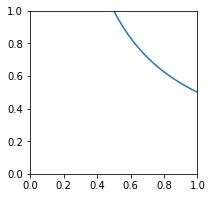

In [40]:
x = np.arange(0.01, 1.01, 0.03)
plt.figure(1, figsize = (3,3))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.plot(x,1/(2*x))
plt.show()

6) Найдем площадь области под графиком функции, для этого разобьем область на две части.  
7) Используя формулу $P(B)=\frac{S_g}{S_G}$ вычислим вероятность события B.

In [46]:
areaB = integrate.quad(lambda x: 1/(2*x),0.5,1)
areaBa = integrate.quad(lambda x: 1,0,0.5)
PB=(areaB[0]+areaBa[0])/area[0]
print(PB)


0.8465735902799727


$\textbf{Ответ:}$

In [47]:
print(PA, PB)

0.5 0.8465735902799727


$\textbf{Задание 3.}$  
Найти вероятность того, что в результате 1000 бросаний монет число выпаданий герба
будет заключено в интервале ]475,525[.  

$\textbf{Решение:}$  
1) Используем теорему Муавра-Лапласа.  
Формула вероятности:    
$$P(\alpha<\xi<\beta)=\Phi(\frac{\beta-np}{\sqrt{npq}})-\Phi(\frac{\alpha-np}{\sqrt{npq}})$$
где $$\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_0^x e^{\frac{-t^2}{2}}dt$$ - функция Лапласа.  
2) Найдем вероятность события, для этого создадим функцию вычисляющую значения функции Лапласа:

In [48]:
from math import exp, pi
from scipy import integrate
def arg (x,n,p,q):
    return (x-n*p)/((n*p*q)**(1/2))
def laplace(z):
    return integrate.quad(lambda t: exp((-t**2)/2),0,z)[0]*(1/(2*pi)**(1/2))
alfa=475
beta=525
n=1000
p=q=0.5
result=laplace(arg(beta,n,p,q))-laplace(arg(alfa,n,p,q))


$\textbf{Ответ:}$

In [49]:
print(result)

0.8861537019933421
